Imports

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

Carregar o Dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((img_treino, id_treino),(img_teste, id_teste)) = dataset.load_data()

Explorar os Dados

In [3]:
len(img_treino)
img_treino.shape
img_teste.shape
len(id_treino)
len(id_teste)
id_treino
id_treino.min()
id_treino.max()

9

Primeira exibição de Dados

Text(0.5, 1.0, '9')

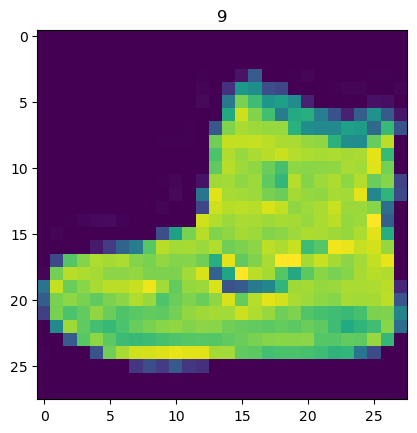

In [4]:
plt.imshow(img_treino[0])
plt.title(id_treino[0])

Exibir os Dados

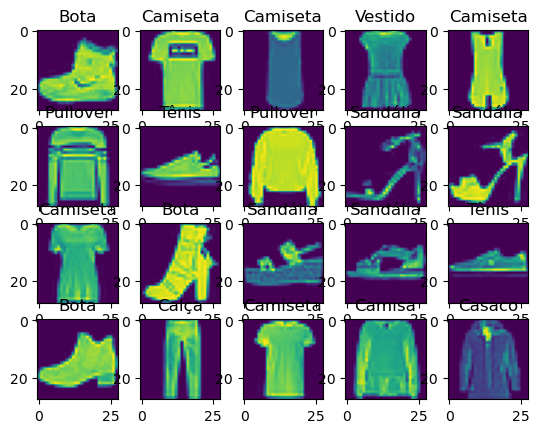

In [5]:
total_classificacoes = 20
nomes_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 
                        'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(20):
    plt.subplot(4, 5, imagem+1)
    plt.imshow(img_treino[imagem])
    plt.title(nomes_classificacoes[id_treino[imagem]])

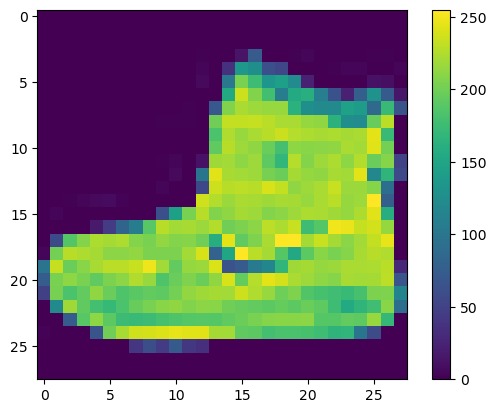

In [6]:
plt.imshow(img_treino[0])
plt.colorbar()

Normalizando as Imagens

In [7]:
img_treino = img_treino/float(255)

Criando, compilando, treinando e normalizando o Modelo

In [8]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(128, activation=tensorflow.nn.relu),
    #keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historico = modelo.fit(img_treino, id_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5268 - accuracy: 0.8135 - val_loss: 0.4135 - val_accuracy: 0.8541
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3951 - accuracy: 0.8547 - val_loss: 0.3684 - val_accuracy: 0.8673
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3616 - accuracy: 0.8663 - val_loss: 0.3588 - val_accuracy: 0.8674
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3389 - accuracy: 0.8753 - val_loss: 0.3442 - val_accuracy: 0.8744
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3203 - accuracy: 0.8815 - val_loss: 0.3265 - val_accuracy: 0.8808


Salvando e carregando o Modelo treinado

In [9]:
modelo.save('Modelo.h5')
modelo_salvo = load_model('Modelo.h5')

Visualizando as Acurácias de Treino e Validação por época

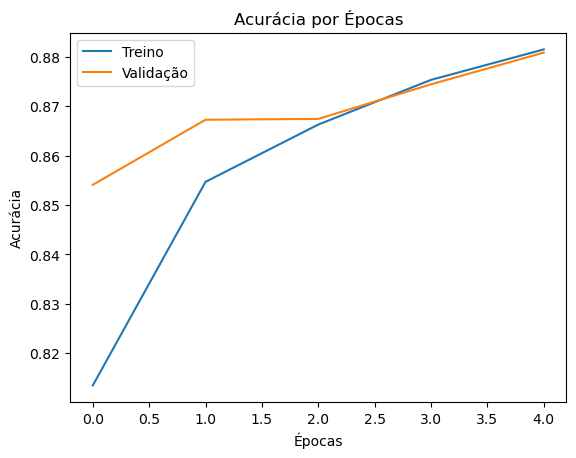

In [10]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

Visualizando as Perdas de Treino e Validação por época

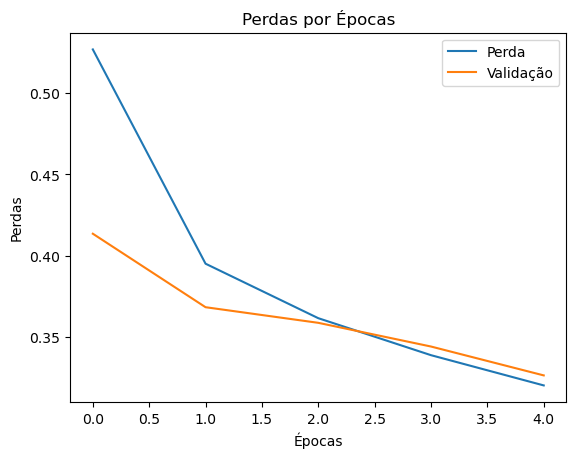

In [11]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Perda', 'Validação'])

Testando o Modelo e o Modelo Salvo

In [12]:
testes = modelo.predict(img_teste)
print('Resultado teste:', np.argmax(testes[0]))
print('Número de Imagem de Teste', id_teste[0])

313/313 [==============================] - 0s 1ms/step
Resultado teste: 9
Número de Imagem de Teste 9


In [13]:
testes = modelo.predict(img_teste)
print('Resultado teste:', np.argmax(testes[1]))
print('Número de Imagem de Teste', id_teste[1])

testes_modelo_salvo = modelo_salvo.predict(img_teste)
print('Resultado teste mdo modelo salvo:', np.argmax(testes_modelo_salvo[0]))
print('Número de Imagem de Teste', id_teste[0])

313/313 [==============================] - 0s 1ms/step
Resultado teste: 2
Número de Imagem de Teste 2
313/313 [==============================] - 0s 1ms/step
Resultado teste mdo modelo salvo: 9
Número de Imagem de Teste 9


In [14]:
print('Resultado teste:', np.argmax(testes[21]))
print('Número de Imagem de Teste', id_teste[21])

Resultado teste: 5
Número de Imagem de Teste 5


Avaliando o Modelo

In [15]:
perda_teste, acuracia_teste = modelo.evaluate(img_teste, id_teste)
print('Perda do Teste:', perda_teste)
print('Acuracia do Teste:', acuracia_teste)

313/313 [==============================] - 1s 1ms/step - loss: 60.4937 - accuracy: 0.8584
Perda do Teste: 60.493682861328125
Acuracia do Teste: 0.8583999872207642
